# Importing libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
df = pd.read_csv('/content/product_purchase.csv')
df.head()

,TimeOnSite,Age,Gender,AdsClicked,PreviousPurchases,Purchase
0,8.467391,41.0,Female,8.0,3.0,1.0
1,18.816166,41.0,Female,7.0,1.0,0.0
2,7.457470,18.0,Male,1.0,NaN,1.0
3,11.136754,63.0,Male,NaN,2.0,0.0
4,5.102389,55.0,Female,3.0,2.0,1.0


# Handling Null Values

In [84]:
df = df.fillna(0)

In [85]:
df.isnull().sum()

,0
TimeOnSite,0
Age,0
Gender,0
AdsClicked,0
PreviousPurchases,0
Purchase,0


In [86]:
# Filling the values > 1 with 1
df['Purchase'] = df['Purchase'].apply(lambda x: 1 if x > 1 else x)

In [87]:
df.Gender.value_counts()

,count
Gender,
Male,107
Female,93


# Data Visualization

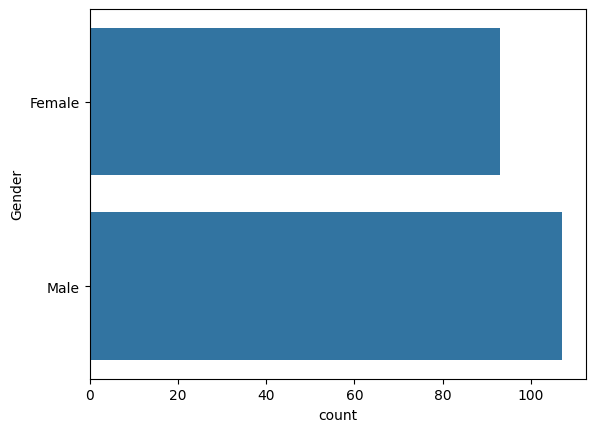

In [88]:
# Countplot for gender column
sns.countplot(df['Gender'])
plt.show()

In [89]:
# Finding who has more previous purchases
df.groupby('PreviousPurchases')['Gender'].value_counts()

PreviousPurchases  Gender
0.00000            Female    25
                   Male      25
1.00000            Female    20
                   Male      19
2.00000            Male      23
                   Female    10
3.00000            Female    17
                   Male      17
4.00000            Male      18
                   Female    16
9.00023            Female     5
                   Male       5
Name: count, dtype: int64

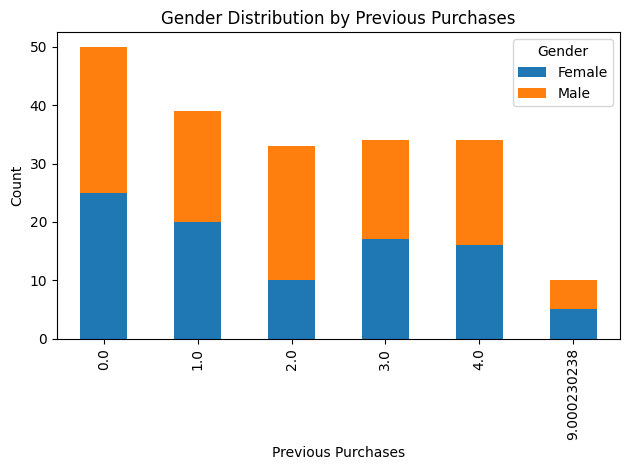

In [90]:
# Countplot for previous purcahses stacked by gender
gender_counts = df.groupby(['PreviousPurchases', 'Gender']).size().unstack()

gender_counts.plot(kind = 'bar', stacked = True)
plt.title("Gender Distribution by Previous Purchases")
plt.xlabel("Previous Purchases")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

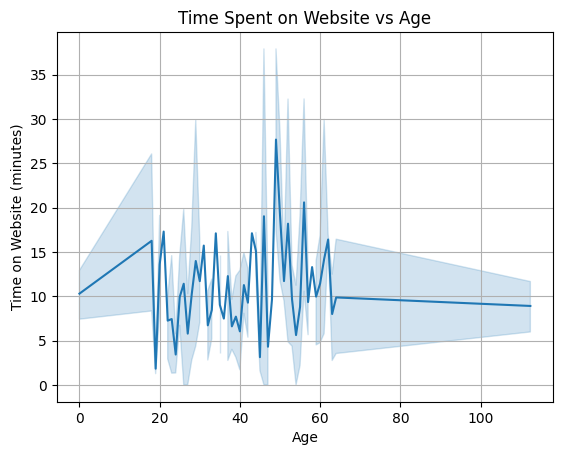

In [91]:
# TimeOnSite vs age
df_sorted = df.sort_values(by = 'Age')

sns.lineplot(data = df_sorted, x = 'Age', y = 'TimeOnSite')
plt.title('Time Spent on Website vs Age')
plt.xlabel('Age')
plt.ylabel('Time on Website (minutes)')
plt.grid(True)
plt.show()

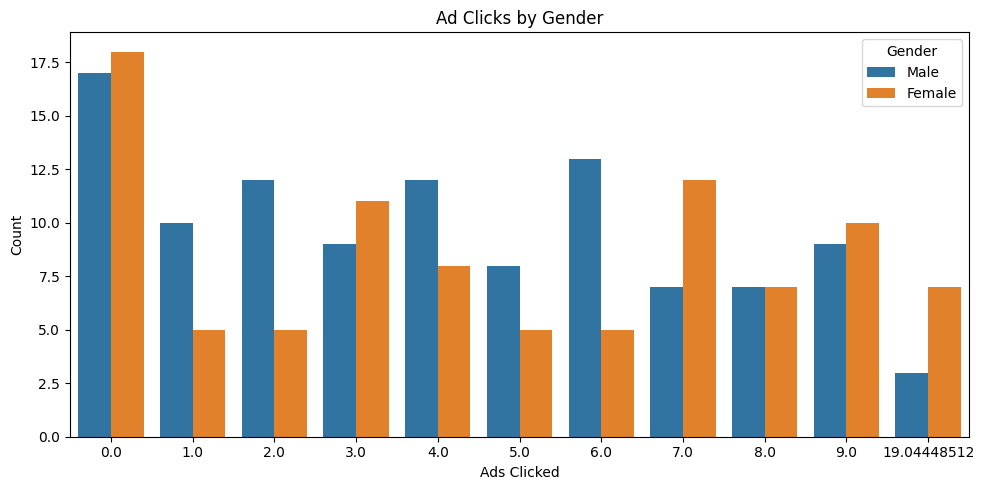

In [92]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'AdsClicked', hue = 'Gender')
plt.title("Ad Clicks by Gender")
plt.xlabel("Ads Clicked")
plt.ylabel("Count")
plt.legend(title = "Gender")
plt.tight_layout()
plt.show()

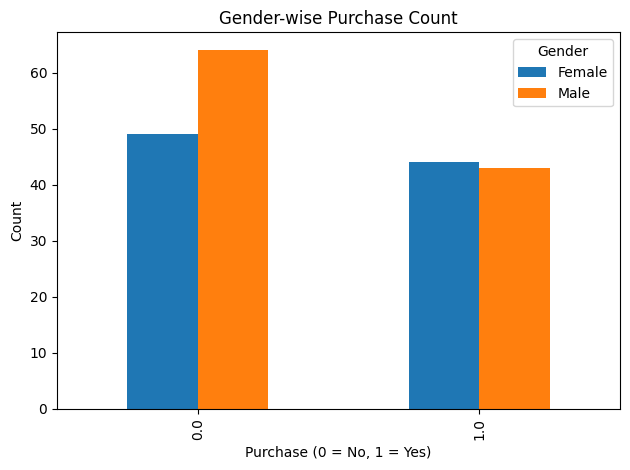

In [93]:
# Count plot for Purchase according to the gender
purchase_gender = df.groupby(['Purchase', 'Gender']).size().unstack()

purchase_gender.plot(kind = 'bar')
plt.title("Gender-wise Purchase Count")
plt.xlabel("Purchase (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title = "Gender")
plt.tight_layout()
plt.show()

# Preparing Data

In [94]:
# Handling categorical values
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

# Model Building

In [95]:
# Setting input and output values
X = df.drop('Purchase', axis = 1)
y = df['Purchase']

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [98]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [99]:
gnb.score(X_train, y_train)

0.575

In [100]:
gnb.score(X_test, y_test)

0.575

In [101]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0.])

In [103]:
y_pred_binary = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[16  8]
 [ 9  7]]


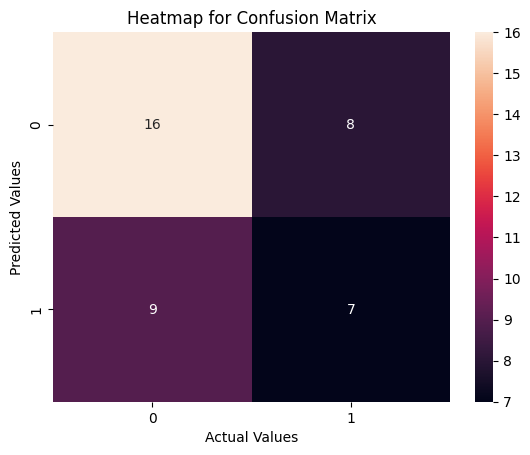

In [104]:
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Heatmap for Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [105]:
y_pred_prob = gnb.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65        24
         1.0       0.47      0.44      0.45        16

    accuracy                           0.57        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.57      0.57      0.57        40



In [111]:
# Using logistic regression for better score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5875
0.625
